In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('./Podatki/pn2019.csv', delimiter=';', encoding='mbcs')

Koordiante so v 20. in 21. stoplcu

In [3]:
x = data.iloc[:, 20:21]
y = data.iloc[:, 21:22]
xy = data.iloc[:, 20:22]

In [18]:
def narisi_graf(array_gostote):
    # kreiranje podatkov
    array_gostote = np.array(array_gostote)
    X, Y, GP = array_gostote.T
    #X = x.reshape(50, 50)
    #Y = y.reshape(50, 50)
    #GP = gp.reshape(50, 50)
    #X += 5
    #Y += 5

    fig, ax = plt.subplots(figsize=(8, 6))
    heatmap = ax.pcolormesh(X, Y, GP, shading='auto')       #  heat map
    fig.colorbar(heatmap, ax=ax, label="opis barvne lestvice")
    ax.set_title("Toplotna karta nesreč - Ljubljana")                                          # naslov grafa
    ax.set_xlabel("$x$ os")
    ax.set_ylabel("$y$ os")

In [20]:
x = x[x.GeoKoordinataX != 0] # Odstrani pomakljive podatke
y = y[y.GeoKoordinataY != 0]
xy = xy[xy.GeoKoordinataY != 0]
xy = xy[xy.GeoKoordinataX != 0]
xmin, ymin = xy.min()
xmax, ymax = xy.max()
xmin, xmax, ymin, ymax = 90000, 110000, 450000, 480000  # Ljubljana

In [21]:
def gostota(x0, x1, y0, y1, xy):
    go = len(xy[(xy.GeoKoordinataX < x1) & (xy.GeoKoordinataX >= x0) & (xy.GeoKoordinataY < y1) & (xy.GeoKoordinataY >= y0)])
    return go

resX = 500
resY = 500

arr_gostota = []
for cx in range(xmin // resX * resX, xmax + resX, resX):
    vrstica = []
    for cy in range(ymin // resY * resY, ymax + resY, resY):
        go = gostota(cx, cx + resX, cy, cy + resY, xy)
        vrstica.append((cx, cy, go))
    arr_gostota.append(vrstica)

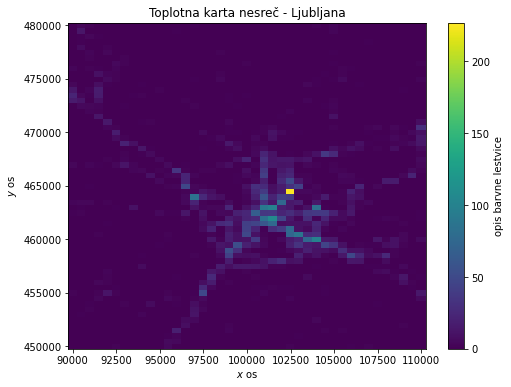

In [22]:
narisi_graf(arr_gostota)

